## Proyecto Data Science, Santiago Cecchini

---

## presentacion

### Objetivo Principal:

Identificar caracteristicas o patrones en torno al comportamiento de compra de los clientes.

### Preguntas de Interes:

*   ¿Los clientes que reciben descuentos tienden a gastar más en promedio?
*   ¿Son efectivos los descuentos a consumidores habituales?
*   ¿En que medida se corresponden con mayores ventas?


### Contexto Comercial

*Empresa:* Una tienda de comercio electrónico que vende una variedad de productos de ropa y accesorios.

*Problema Comercial:* La tienda desea optimizar sus estrategias de marketing y ventas enfocándose en las características clave que influyen en el comportamiento de compra de los clientes. Reducir la dimensionalidad del dataset permitirá un análisis más eficiente y una mejor comprensión de los factores determinantes de las compras.

### Contexto Analítico

**Dataset:** Información de compras de clientes, incluyendo características demográficas, detalles de los productos comprados, y datos sobre el proceso de compra.

*Variables:*

- Customer ID: Identificacion unica del cliente.                     **ID**
- Age: Edad del cliente.                                             **Var: numerica**
- Gender: Genero del cliente.                                        **Var: Categorica, binaria**
- Item Purchased: Producto comprado.                                 **Var: Categorica, nominal**
- Category: Categoria del producto.                                  **Var: Categorica, nominal**
- Purchase Amount (USD): Monto de la compra en USD.                  **Var: Numerica, discreto**
- Location: Ubicación del cliente.                                   **Var: Categorica, nominal**
- Size: Tamaño del producto.                                         **Var: Categorica, ordinal**
- Color: Color del producto.                                         **Var: Categorica, nominal**
- Season: Temporada de la compra.                                    **Var: Categorica, nominal**
- Review Rating: Calificación de la reseña dada por el cliente.      **Var: Numerica, continua**
- Subscription Status: Estado de suscripción (Sí/No).                **Var: Categorica, binaria**
- Promo Code Used: Código promocional usado (Sí/No).                 **Var: Categorica, binaria**
- Previous Purchases: Número de compras anteriores.                  **Var: Numerica, Discreta**
- Payment Method: Método de pago.                                    **Var: Categorica, Nominal**
- Frequency of Purchases: Frecuencia de las compras.                 **Var: Categorica, ordinal**
    

## Desarrollo

### Importacion de librerias y Dataset

In [50]:
import pandas                  as pd
from   scipy import stats
import numpy                   as np


import matplotlib.pyplot       as plt
import seaborn                 as sns
import matplotlib              as mpl

#%matplotlib inline

In [8]:
# Configurando matplotlib
mpl.rcParams['axes.titleweight'] = 'bold'
#mpl.rcParams['axes.titlelocation'] = 'left'
mpl.rcParams['axes.titlecolor'] = 'blue'#'firebrick'
mpl.rcParams['axes.labelcolor'] = 'blue'
mpl.rcParams['axes.labelsize'] = '10'
mpl.rcParams['axes.labelweight'] = 'light'
mpl.rcParams['axes.linewidth'] = '1'
mpl.rcParams['grid.color'] = 'black'
mpl.rcParams['grid.linestyle'] = '-.'
mpl.rcParams['grid.linewidth'] = '2'

In [9]:
#https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
plt.style.use('fast')

In [10]:
# Configurando seaborn
sns.set_style(style="white")
sns.set_style(rc={"grid.linestyle": ":"})
sns.set_style(rc={"axes.titleweight": "normal"})
sns.set_style(rc={"axes.titlecolor": "blue"})
sns.set_style(rc={"axes.labelcolor": "blue"})
sns.set_style(rc={"axes.labelsize": "12"})
sns.set_style(rc={"axes.labelweight": "normal"})
sns.set_style(rc={"axes.linewidth": "0.5"})
sns.set_style(rc={"grid.color": "purple"})
sns.set_style(rc={"grid.linestyle": "--"})
sns.set_style(rc={"grid.linewidth": "0.5"})
sns.set_style(rc={"font.fantasy": "Comic Sans MS"})
sns.set_style(rc={"font.serif": "Utopia"})

In [15]:
#sns.reset_orig()

In [19]:
df = pd.read_csv('shopping_behavior_updated.csv')

In [17]:
file_path = 'C/Users/Hogar/Documents/ProyectoDS/shopping_behavior_updated.csv'

### Exploracion incial 

In [175]:
df.head()

,ID,Age,Gender,Item,Category,Purchase_Amount,Location,Size,Color,Season,Review_Rating,Subscription_Status,Shipping_Type,Discount_Applied,Previous_Purchases,Payment_Method,Frequency_Of_Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,31,PayPal,Annually


In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item                    3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase_Amount         3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review_Rating           3900 non-null   float64
 11  Subscription_Status     3900 non-null   object 
 12  Shipping_Type           3900 non-null   object 
 13  Discount_Applied        3900 non-null   object 
 14  Previous_Purchases      3900 non-null   

In [171]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,3900.0,NaN,NaN,NaN,1950.5,1125.977353,1.0,975.75,1950.5,2925.25,3900.0
Age,3900.0,NaN,NaN,NaN,44.068462,15.207589,18.0,31.0,44.0,57.0,70.0
Gender,3900,2,Male,2652,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item,3900,25,Blouse,171,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,3900,4,Clothing,1737,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Purchase_Amount,3900.0,NaN,NaN,NaN,59.764359,23.685392,20.0,39.0,60.0,81.0,100.0
Location,3900,50,Montana,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Size,3900,4,M,1755,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Color,3900,25,Olive,177,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Season,3900,4,Spring,999,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Cambio el nombre de las variables para mayor facilidad a la hora de escribir codigo
#Elimino la columna "Promo Code Used" porque es exactamente igual a "Discount Applied"

df.rename(columns={'Consumer ID': 'ID','Item Purchased':'Item','Purchase Amount':'Purchase_Amount','Review Rating':'Review_Rating','Subscription Status':'Subscription_Status','Shipping Type':'Shipping_Type','Discount Applied':'Discount_Applied','Previous Purchases':'Previous_Purchases','Payment Method':'Payment_Method','Frequency of Purchases':'Frequency_Of_Purchases'}, inplace=True)
df.drop('Promo Code Used', axis=1, inplace=True)

### Valores Nulos 

In [177]:
df.isna().sum()

ID                        0
Age                       0
Gender                    0
Item                      0
Category                  0
Purchase_Amount           0
Location                  0
Size                      0
Color                     0
Season                    0
Review_Rating             0
Subscription_Status       0
Shipping_Type             0
Discount_Applied          0
Previous_Purchases        0
Payment_Method            0
Frequency_Of_Purchases    0
dtype: int64

In [179]:
df.isnull().mean()

ID                        0.0
Age                       0.0
Gender                    0.0
Item                      0.0
Category                  0.0
Purchase_Amount           0.0
Location                  0.0
Size                      0.0
Color                     0.0
Season                    0.0
Review_Rating             0.0
Subscription_Status       0.0
Shipping_Type             0.0
Discount_Applied          0.0
Previous_Purchases        0.0
Payment_Method            0.0
Frequency_Of_Purchases    0.0
dtype: float64

<Axes: >

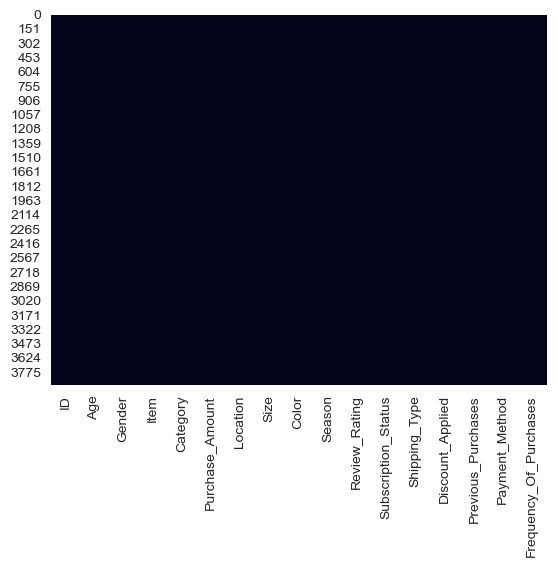

In [181]:
sns.heatmap(df.isna(), cbar=False)

In [90]:
!pip install missingno

In [92]:
import missingno as msno

<Axes: >

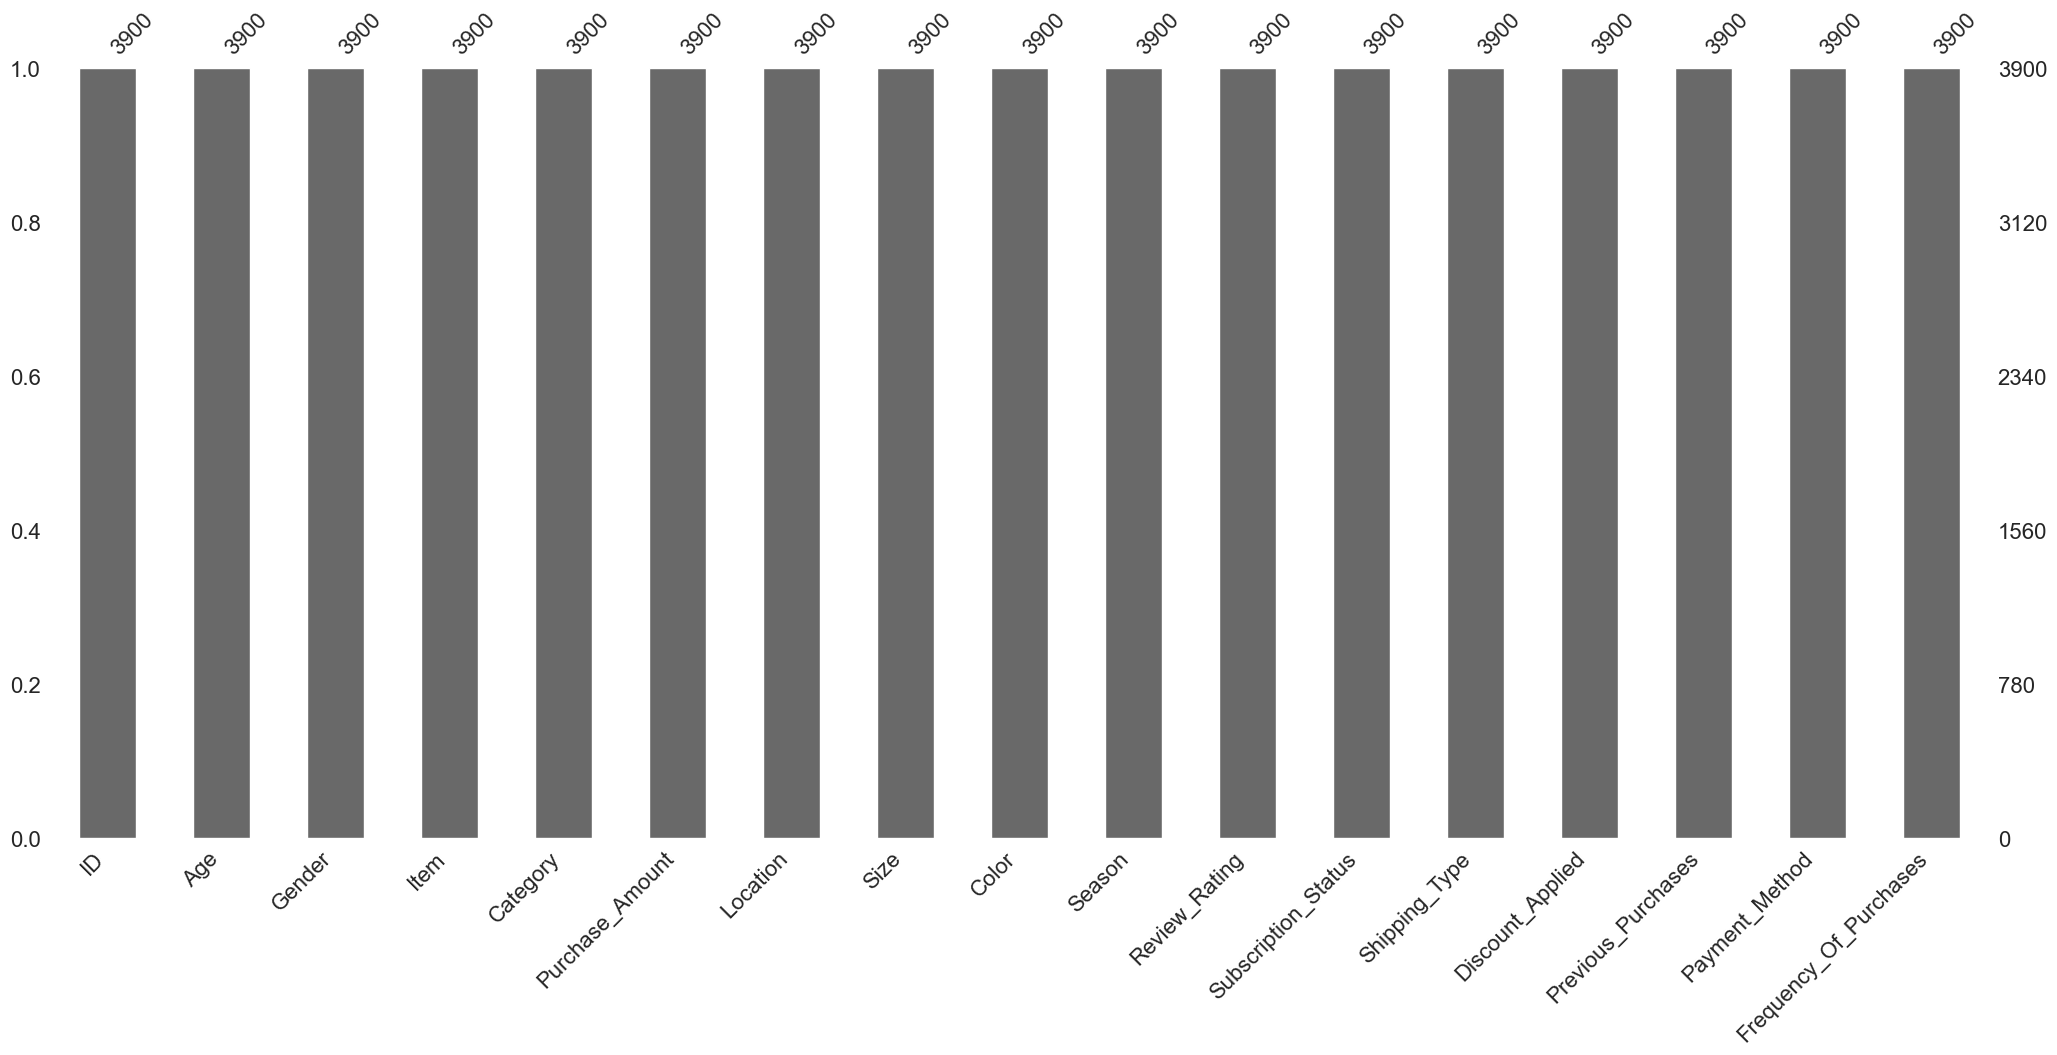

In [183]:
msno.bar(df)

**Datos Nulos:** No se hallaron datos nulos, todas las columnas presentan datos completos

## EDA

D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf

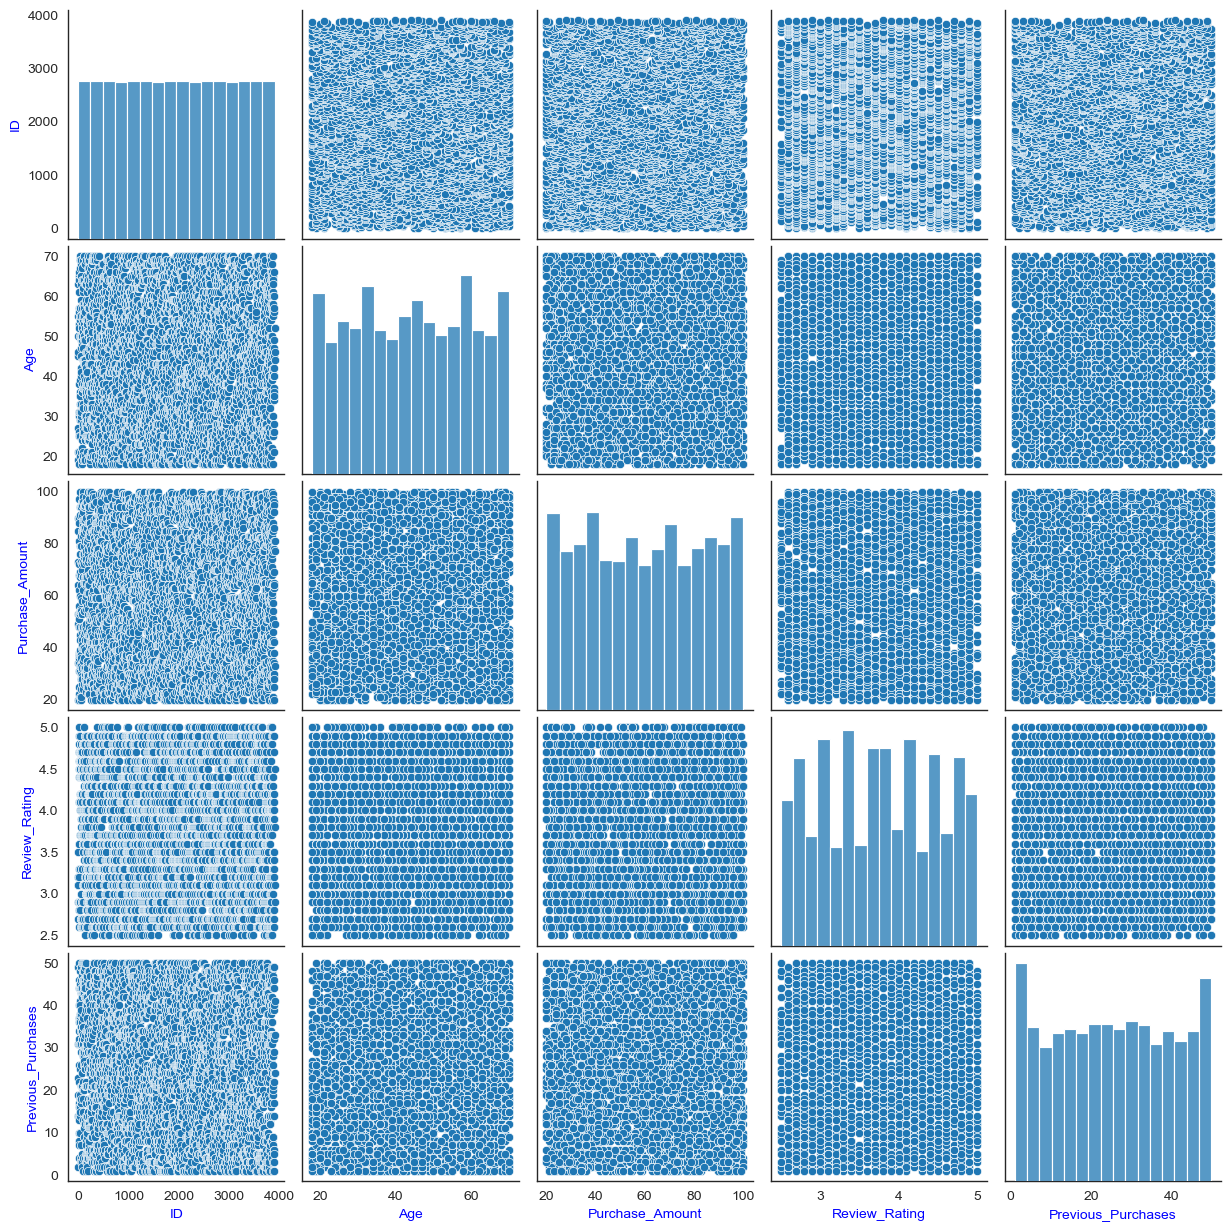

In [185]:
sns.pairplot(df, kind='scatter')

In [201]:
df.Age.describe()

count    3900.000000
mean       44.068462
std        15.207589
min        18.000000
25%        31.000000
50%        44.000000
75%        57.000000
max        70.000000
Name: Age, dtype: float64

In [203]:
df.Purchase_Amount.describe()

count    3900.000000
mean       59.764359
std        23.685392
min        20.000000
25%        39.000000
50%        60.000000
75%        81.000000
max       100.000000
Name: Purchase_Amount, dtype: float64

In [205]:
df.Review_Rating.describe()

count    3900.000000
mean        3.749949
std         0.716223
min         2.500000
25%         3.100000
50%         3.700000
75%         4.400000
max         5.000000
Name: Review_Rating, dtype: float64

In [207]:
df.Previous_Purchases.describe()

count    3900.000000
mean       25.351538
std        14.447125
min         1.000000
25%        13.000000
50%        25.000000
75%        38.000000
max        50.000000
Name: Previous_Purchases, dtype: float64

D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


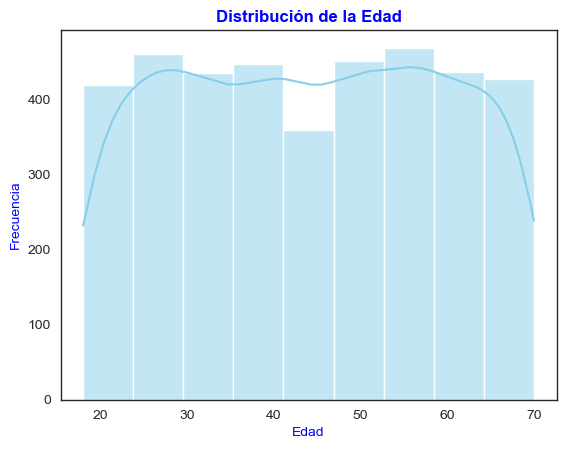

In [56]:
sns.histplot(df['Age'], bins=9, kde=True, color='skyblue')
plt.title('Distribución de la Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


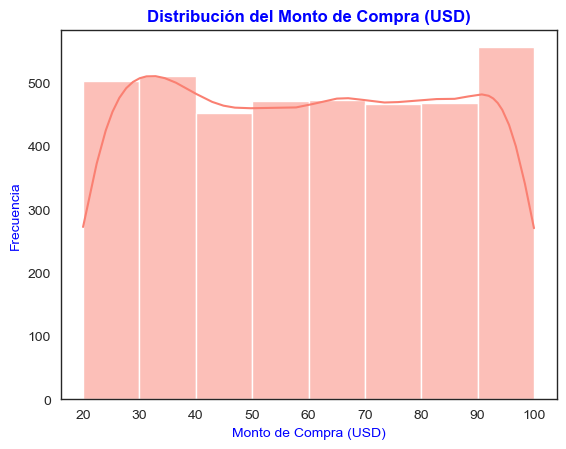

In [81]:
sns.histplot(df['Purchase Amount (USD)'], bins=8, kde=True, color='salmon')
plt.title('Distribución del Monto de Compra (USD)')
plt.xlabel('Monto de Compra (USD)')
plt.ylabel('Frecuencia')
plt.show()

D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


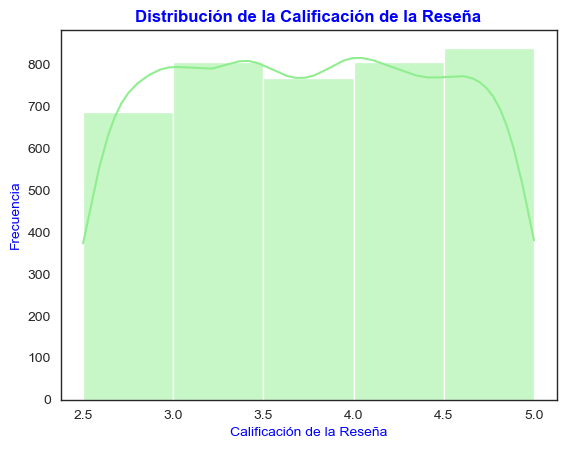

In [62]:
sns.histplot(df['Review Rating'], bins=5, kde=True, color='lightgreen')
plt.title('Distribución de la Calificación de la Reseña')
plt.xlabel('Calificación de la Reseña')
plt.ylabel('Frecuencia')
plt.show()

In [223]:
print(gender_counts)
print(subscription)
print(descuento)

Gender
Male      2652
Female    1248
Name: count, dtype: int64
Subscription_Status
No     2847
Yes    1053
Name: count, dtype: int64
Discount_Applied
No     2223
Yes    1677
Name: count, dtype: int64


Text(0.5, 1.0, 'Descuento aplicado')

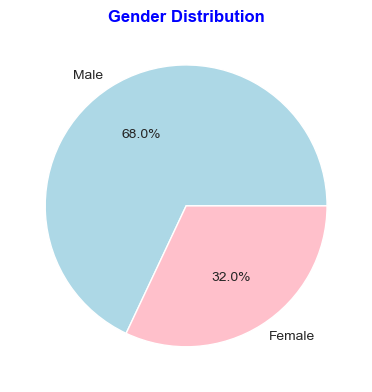

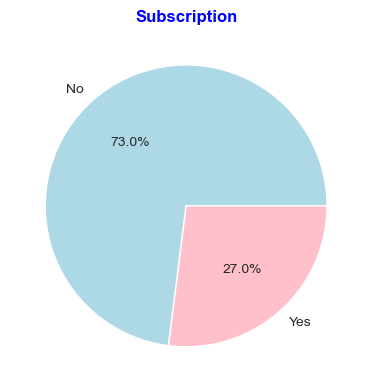

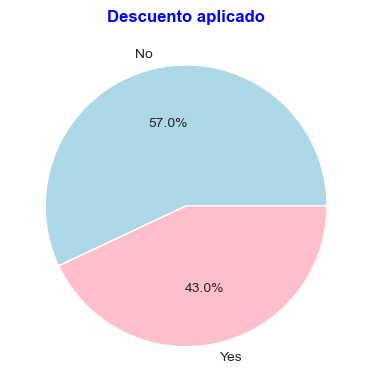

In [217]:
#Genero
gender_counts = df['Gender'].value_counts()

# Grafico de torta para ver la proporcion de Hombres y mujeres entren los consumidores
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['lightblue', 'pink'])
plt.title('Gender Distribution')

#Subscripcion
subscription = df['Subscription_Status'].value_counts()

# Grafico de torta para ver la proporcion de subscripcion entren los consumidores
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.pie(subscription, labels=subscription.index, autopct='%1.1f%%', colors=['lightblue', 'pink'])
plt.title('Subscription')

#Descuento Aplicado
descuento = df['Discount_Applied'].value_counts()

# Grafico de torta para ver la proporcion de descuentos aplicados entren los consumidores
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.pie(descuento, labels=descuento.index, autopct='%1.1f%%', colors=['lightblue', 'pink'])
plt.title('Descuento aplicado')

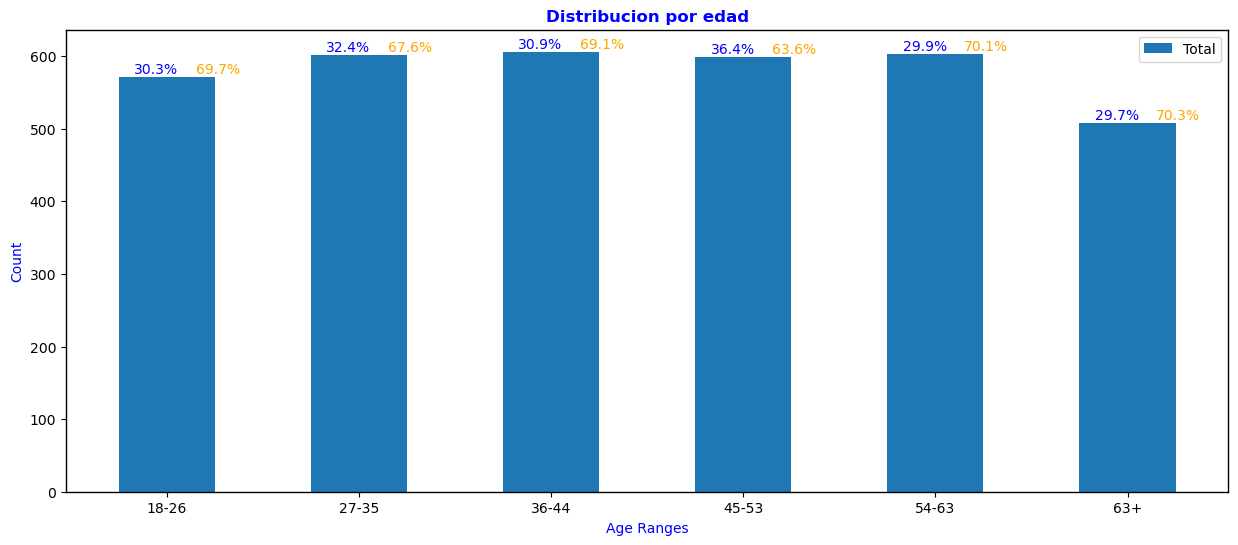

In [49]:

#Defino rangos de edades; amplitud de edades de los datos registrados es de 52 años (70-18), tomo de referencia rangos de 9 años
age_ranges = {
    '18-26': range(18, 26),
    '27-35': range(27, 35),
    '36-44': range(36, 44),
    '45-53': range(45, 53),
    '54-63': range(54, 62),
    '63+': range(63, 70)
}

# Count individuals in each age range
age_counts = {age_range: data[data['Age'].isin(age_ranges[age_range])]['Age'].count() for age_range in age_ranges}

# Count Female and Male in each age range
gender_counts = {}
for age_range, age_range_values in age_ranges.items():
    age_range_data = data[data['Age'].isin(age_range_values)]
    female_count = age_range_data[age_range_data['Gender'] == 'Female']['Gender'].count()
    male_count = age_range_data[age_range_data['Gender'] == 'Male']['Gender'].count()
    total_count = female_count + male_count
    gender_counts[age_range] = {'Female': female_count / total_count * 100, 'Male': male_count / total_count * 100}


# Plotting
fig, ax = plt.subplots(figsize=(15, 6))

index = np.arange(len(age_counts))
bar_width = 0.5

bars_total = plt.bar(index, age_counts.values(), bar_width, label='Total')

for i, age_range in enumerate(age_ranges.keys()):
    female_percentage = gender_counts[age_range]['Female']
    male_percentage = gender_counts[age_range]['Male']
    plt.text(i - 0.17, age_counts[age_range] + 5, f'{female_percentage:.1f}%', fontsize=10, color='blue')
    plt.text(i + 0.15, age_counts[age_range] + 5, f'{male_percentage:.1f}%', fontsize=10, color='orange')

ax.set_xlabel('Age Ranges')
ax.set_ylabel('Count')
ax.set_title('Distribucion por edad')
ax.set_xticks(index)
ax.set_xticklabels(age_counts.keys())
ax.legend()

plt.show()

In [45]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Preprocessing
# Convert categorical variables to numerical
categorical_cols = ['Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color', 
                    'Season', 'Subscription Status', 'Shipping Type', 'Discount Applied', 
                    'Promo Code Used', 'Payment Method', 'Frequency of Purchases']

# Initialize LabelEncoder
label_encoders = {col: LabelEncoder() for col in categorical_cols}

# Encode categorical columns
for col in categorical_cols:
    df[col] = label_encoders[col].fit_transform(df[col])

# Features and target variable
X = df.drop(columns=['Purchase Amount (USD)'])
y = df['Purchase Amount (USD)']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize the logistic regression model
model = LogisticRegression(max_iter=1000)

# Initialize RFE with the logistic regression model
rfe = RFE(model, n_features_to_select=10)

# Fit RFE
rfe.fit(X_scaled, y)

# Get the selected features
selected_features = X.columns[rfe.support_]

selected_features


Index(['Customer ID', 'Gender', 'Item Purchased', 'Location', 'Color',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Promo Code Used', 'Payment Method'],
      dtype='object')

### Genero y Edad

Resulta de interes observar que los consumidores hombres representan mas que el doble que las mujeres

Con este grafico podemos ver como se distribuyen los consumidores de acuerdo a su edad, en esta ocasion se ve bastante bine distribuido y no nos indica que haya un grupo etario sobrerreprensetado, esto nos ayudaria a elegir un publico objetivo de determinadas acciones comerciales.

In [116]:
df.Payment.describe()

count    3900.000000
mean       59.764359
std        23.685392
min        20.000000
25%        39.000000
50%        60.000000
75%        81.000000
max       100.000000
Name: Payment, dtype: float64

In [61]:
df.Previous.describe()

count    3900.000000
mean       25.351538
std        14.447125
min         1.000000
25%        13.000000
50%        25.000000
75%        38.000000
max        50.000000
Name: Previous, dtype: float64

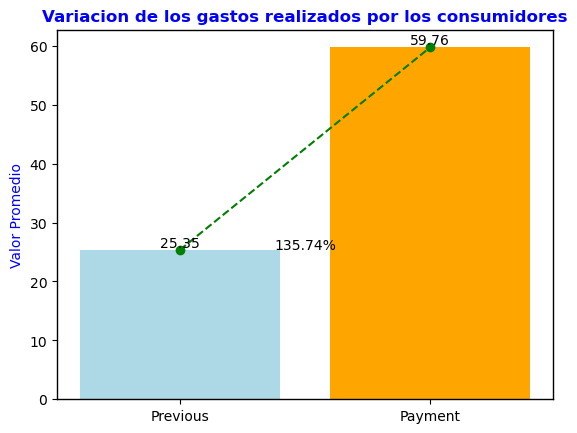

In [62]:
#Calculo el valor promedio de 'Previous' y 'Payment'
previo_promedio = df['Previous'].mean()
pago_promedio = df['Payment'].mean()

#Calculo la variación porcentual
variacion_porcentual = ((pago_promedio - previo_promedio) / previo_promedio) * 100

#Grafico de barras
plt.bar(['Previous', 'Payment'], [previo_promedio, pago_promedio], color=['lightblue', 'orange'])
plt.ylabel('Valor Promedio')
plt.title('Variacion de los gastos realizados por los consumidores')

#Etiqueta variacion porcentual
plt.text(0.5, previo_promedio + 0.1, f'{variacion_porcentual:.2f}%', ha='center')

#Linea de la variacion
plt.plot([0, 1], [previo_promedio, pago_promedio], color='green', linestyle='--', marker='o')

#Etiquetas de las columnas
plt.text(0, previo_promedio, f'{previo_promedio:.2f}', ha='center', va='bottom')
plt.text(1, pago_promedio, f'{pago_promedio:.2f}', ha='center', va='bottom')

plt.show()

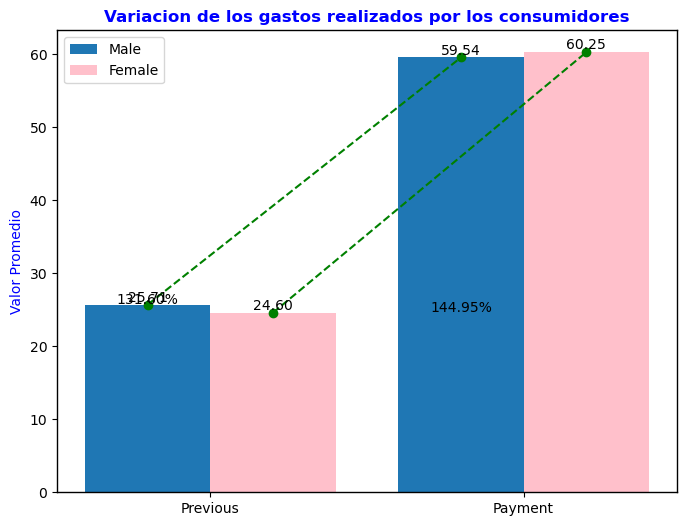

In [63]:
# Paso 1: Calcular el valor promedio de 'Previous' y 'Payment' para cada género
previo_promedio_male = data[data['Gender'] == 'Male']['Previous'].mean()
pago_promedio_male = data[data['Gender'] == 'Male']['Payment'].mean()
previo_promedio_female = data[data['Gender'] == 'Female']['Previous'].mean()
pago_promedio_female = data[data['Gender'] == 'Female']['Payment'].mean()

# Paso 2: Calcular la variación porcentual para cada género
variacion_porcentual_male = ((pago_promedio_male - previo_promedio_male) / previo_promedio_male) * 100
variacion_porcentual_female = ((pago_promedio_female - previo_promedio_female) / previo_promedio_female) * 100

# Paso 3: Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(8, 6))

bar_width = 0.4
index = [0, 1]

bars_male = ax.bar(index, [previo_promedio_male, pago_promedio_male], bar_width, label='Male')
bars_female = ax.bar([p + bar_width for p in index], [previo_promedio_female, pago_promedio_female], bar_width, label='Female', color='pink')

# Paso 4: Agregar etiqueta con la variación porcentual para cada género
plt.text(0, previo_promedio_male + 0.1, f'{variacion_porcentual_male:.2f}%', ha='center')
plt.text(1, previo_promedio_female + 0.1, f'{variacion_porcentual_female:.2f}%', ha='center')

# Paso 5: Agregar línea que refleje la variación porcentual para cada género
plt.plot([0, 1], [previo_promedio_male, pago_promedio_male], color='green', linestyle='--', marker='o')
plt.plot([p + bar_width for p in index], [previo_promedio_female, pago_promedio_female], color='green', linestyle='--', marker='o')

# Paso 6: Agregar etiquetas con los valores obtenidos en cada columna para cada género
plt.text(0, previo_promedio_male, f'{previo_promedio_male:.2f}', ha='center', va='bottom')
plt.text(1, pago_promedio_male, f'{pago_promedio_male:.2f}', ha='center', va='bottom')
plt.text(0 + bar_width, previo_promedio_female, f'{previo_promedio_female:.2f}', ha='center', va='bottom')
plt.text(1 + bar_width, pago_promedio_female, f'{pago_promedio_female:.2f}', ha='center', va='bottom')

ax.set_xticks([0.2, 1.2])
ax.set_xticklabels(['Previous', 'Payment'])
plt.ylabel('Valor Promedio')
plt.title('Variacion de los gastos realizados por los consumidores')

plt.legend()
plt.show()


En este grafico se intento hacer una distincion entre sexos, como orbservacion vemos un aumento porcentual mayor entre las mujeres

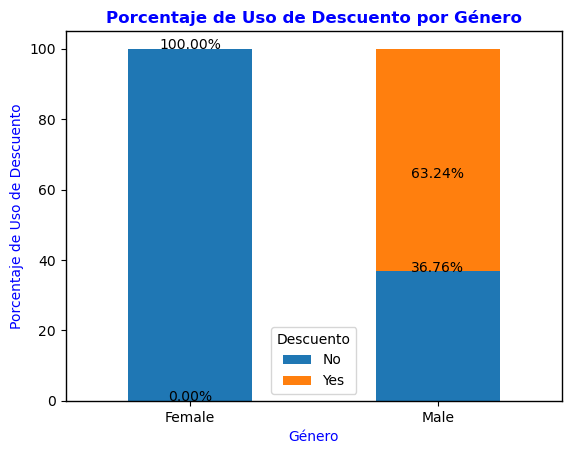

In [72]:
# Paso 1: Calcular el porcentaje de cada género que utilizó o no el descuento
porcentaje_descuento_por_genero = data.groupby('Gender')['Discount'].value_counts(normalize=True).unstack() * 100

# Paso 2: Crear el gráfico de barras apiladas
ax = porcentaje_descuento_por_genero.plot(kind='bar', stacked=True)

# Paso 3: Añadir etiquetas con los números correspondientes a cada porcentaje
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2, height), ha='center')

# Paso 4: Añadir etiquetas y título al gráfico
plt.title('Porcentaje de Uso de Descuento por Género')
plt.xlabel('Género')
plt.ylabel('Porcentaje de Uso de Descuento')
plt.xticks(rotation=0)  # Rotar etiquetas del eje x

plt.legend(title='Descuento')

plt.show()

En el siguiente grafico vemos que el uso de los descuentos se dio unicamente por el publico masculino, esto podria explicar porque los consumos de los hombres duplican, aproximadamente, el consumo de las mujeres

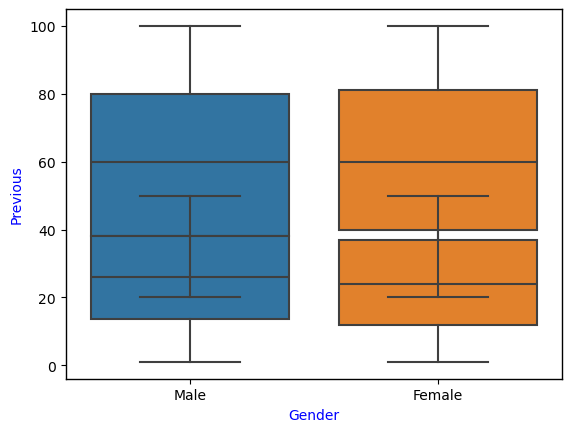

In [76]:
# Axis-level

ax = sns.boxplot(x="Gender", y="Payment", data=data)
ax = sns.boxplot(x="Gender", y="Previous", data=data)


In [87]:
df.corr(method='spearman', min_periods=1, numeric_only=False)


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Previous,Payment
Customer ID,1.000000,-0.004190,-0.807960,0.003694,-0.001540,0.011185,-0.013513,-0.001761,-0.011301,-0.018090,0.001193,-0.768960,-0.020897,-0.857496,-0.857496,-0.039224,-0.015499,-0.012307,-0.039224,0.011185
Age,-0.004190,1.000000,0.002931,-0.000797,0.001568,-0.010445,-0.001755,-0.023347,0.006976,-0.028272,-0.021969,0.006499,-0.011163,0.004450,0.004450,0.040513,-0.005154,0.017036,0.040513,-0.010445
Gender,-0.807960,0.002931,1.000000,0.001801,-0.005911,-0.014312,0.000914,0.018825,-0.000475,0.016325,0.008286,0.417197,0.016484,0.595823,0.595823,0.036022,0.003329,0.012909,0.036022,-0.014312
Item Purchased,0.003694,-0.000797,0.001801,1.000000,0.133077,-0.005063,0.020464,-0.011041,0.027222,0.012475,-0.004384,0.003037,0.016295,-0.014065,-0.014065,-0.001321,-0.006594,0.015182,-0.001321,-0.005063
Category,-0.001540,0.001568,-0.005911,0.133077,1.000000,-0.012092,0.002249,-0.038481,0.013607,0.003357,-0.002593,0.009735,-0.008660,-0.002602,-0.002602,-0.016543,-0.003891,0.009725,-0.016543,-0.012092
Purchase Amount (USD),0.011185,-0.010445,-0.014312,-0.005063,-0.012092,1.000000,0.028990,0.031278,-0.004116,-0.018672,0.030380,-0.006920,-0.024522,-0.018013,-0.018013,0.008315,-0.009430,-0.016974,0.008315,1.000000
Location,-0.013513,-0.001755,0.000914,0.020464,0.002249,0.028990,1.000000,-0.000018,-0.005365,0.012273,-0.004216,0.004747,-0.001467,0.012249,0.012249,-0.032856,-0.006904,-0.012835,-0.032856,0.028990
Size,-0.001761,-0.023347,0.018825,-0.011041,-0.038481,0.031278,-0.000018,1.000000,-0.007385,-0.013989,0.024370,-0.015171,0.000230,0.000105,0.000105,-0.013769,-0.029094,-0.007203,-0.013769,0.031278
Color,-0.011301,0.006976,-0.000475,0.027222,0.013607,-0.004116,-0.005365,-0.007385,1.000000,0.000054,0.027075,0.021358,-0.000190,0.019498,0.019498,0.000542,-0.007459,-0.010008,0.000542,-0.004116
Season,-0.018090,-0.028272,0.016325,0.012475,0.003357,-0.018672,0.012273,-0.013989,0.000054,1.000000,0.000398,-0.005089,0.019180,0.015679,0.015679,0.024553,-0.005388,0.009511,0.024553,-0.018672


---

In [77]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Preprocesamiento
# Convertir variables categóricas a numéricas
categorical_cols = ['Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color', 
                    'Season', 'Subscription Status', 'Shipping Type', 'Discount Applied', 
                    'Promo Code Used', 'Payment Method', 'Frequency of Purchases']

# Inicializar LabelEncoder
label_encoders = {col: LabelEncoder() for col in categorical_cols}

# Codificar columnas categóricas
for col in categorical_cols:
    df[col] = label_encoders[col].fit_transform(df[col])

# Características y variable objetivo
X = df.drop(columns=['Purchase Amount (USD)'])
y = df['Purchase Amount (USD)']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenamiento del modelo de regresión lineal
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predicciones
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Evaluación del modelo
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Resultados
print(f'Mean Squared Error (Train): {mse_train:.2f}')
print(f'Mean Squared Error (Test): {mse_test:.2f}')
print(f'R^2 (Train): {r2_train:.2f}')
print(f'R^2 (Test): {r2_test:.2f}')

# Coeficientes del modelo
coef_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coef_df)


Mean Squared Error (Train): 0.00
Mean Squared Error (Test): 0.00
R^2 (Train): 1.00
R^2 (Test): 1.00
                         Coefficient
Customer ID             3.745569e-15
Age                     8.097689e-15
Gender                  1.238593e-15
Item Purchased          4.300651e-15
Category                1.245583e-14
Location                8.300001e-15
Size                   -5.179999e-15
Color                  -2.088496e-14
Season                 -2.109424e-15
Review Rating          -1.094880e-14
Subscription Status     3.597816e-15
Shipping Type          -1.317945e-14
Discount Applied        8.205242e-16
Promo Code Used        -9.558326e-16
Previous Purchases     -4.548770e-16
Payment Method         -4.929325e-15
Frequency of Purchases  1.670371e-14
Previous               -4.271214e-16
Payment                 2.367394e+01


In [64]:
# importamos libreria para Clustering jerárquico
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [67]:
X = df.iloc[:, [1, 5]]#.values

In [69]:
X

,Age,Purchase Amount (USD)
0,55,53
1,19,64
2,50,73
3,21,90
4,45,49
...,...,...
3895,40,28
3896,52,49
3897,46,33
3898,44,77


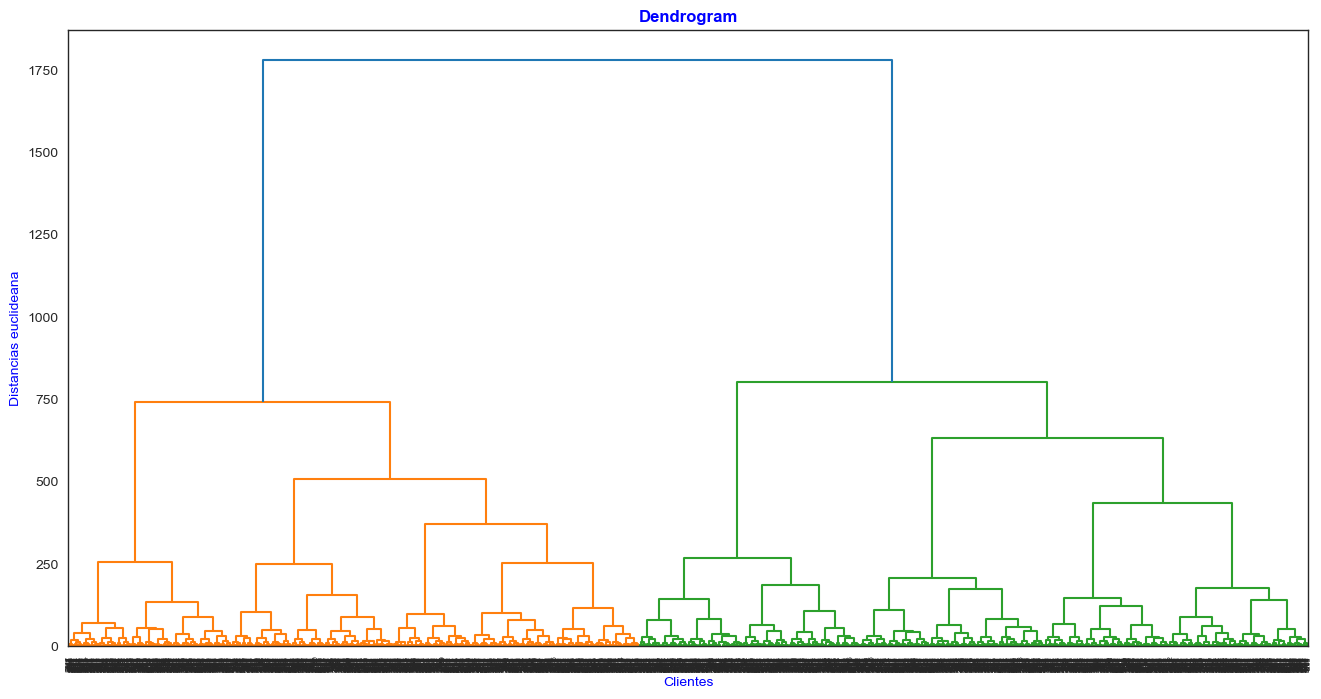

In [71]:
plt.figure(1, figsize = (16 ,8))
dendrogram = sch.dendrogram(sch.linkage(X, method  = "ward",metric='euclidean',),
                            orientation='top',# Diferentes formas: right, left, bottom, top
                            ) # Si eligen del metodo de Ward deben usar euclidean

plt.title('Dendrogram')
plt.xlabel('Clientes')
plt.ylabel('Distancias euclideana')
plt.show()

In [73]:
# Creamos el modelo
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html
model = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
model.fit(X) # fit_predict

D:\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', n_clusters=6)

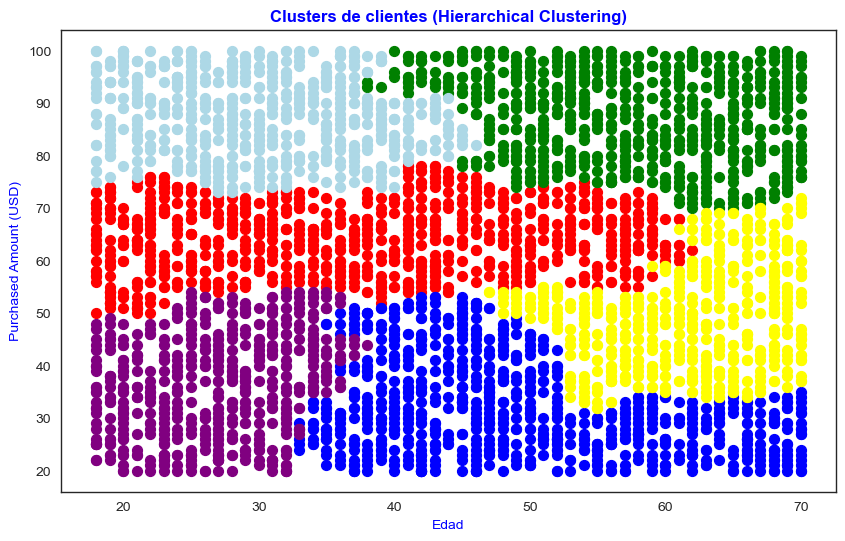

In [75]:
labels = model.labels_

plt.figure(figsize=(10,6))
plt.scatter(X.iloc[labels==0, 0], X.iloc[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(X.iloc[labels==1, 0], X.iloc[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(X.iloc[labels==2, 0], X.iloc[labels==2, 1], s=50, marker='o', color='green')
plt.scatter(X.iloc[labels==3, 0], X.iloc[labels==3, 1], s=50, marker='o', color='purple')
plt.scatter(X.iloc[labels==4, 0], X.iloc[labels==4, 1], s=50, marker='o', color='lightblue')
plt.scatter(X.iloc[labels==5, 0], X.iloc[labels==5, 1], s=50, marker='o', color='yellow')
plt.title('Clusters de clientes (Hierarchical Clustering)')
plt.xlabel('Edad')
plt.ylabel('Purchased Amount (USD)')
plt.show()